In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization

In [ ]:
train_dir='C:/Users/Naveen Sai/deep learning/Ex6_dataset/training_set'
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory(train_dir,target_size=(227,227),batch_size=4,class_mode='binary',subset='training')
validation_generator=datagen.flow_from_directory(train_dir,target_size=(227,227),batch_size=4,class_mode='binary',subset='validation')

Found 640 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [3]:
def alexnet_model():
    model=Sequential([
        Conv2D(4,(11,11),strides=4,activation='relu',input_shape=(227,227,3),padding='valid'),
        MaxPooling2D((3,3),strides=2),
        Conv2D(8,(5,5),strides=1,activation='relu',padding='same'),
        MaxPooling2D((3,3),strides=2),
        Conv2D(8,(3,3),strides=1,activation='relu',padding='same'),
        Conv2D(8,(3,3),strides=1,activation='relu',padding='same'),
        Conv2D(8,(3,3),strides=1,activation='relu',padding='same'),
        MaxPooling2D((3,3),strides=2),
        Flatten(),
        Dense(128,activation='relu'),
        Dense(64,activation='relu'),
        Dense(1,activation='sigmoid')
    ])
    return model
model=alexnet_model()
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,epochs=5,validation_data=validation_generator)

C:\Users\K Jyothsna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 4)           │           1,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 4)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 8)           │             808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 8)           │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,329 (192.69 KB)

 Trainable params: 49,329 (192.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


C:\Users\K Jyothsna\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.5140 - loss: 0.6943 - val_accuracy: 0.5188 - val_loss: 0.6918
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5499 - loss: 0.6894 - val_accuracy: 0.5188 - val_loss: 0.6922
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5554 - loss: 0.6805 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5296 - loss: 0.6879 - val_accuracy: 0.5562 - val_loss: 0.7081
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.5709 - loss: 0.6648 - val_accuracy: 0.5437 - val_loss: 0.6872


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.7842318]]


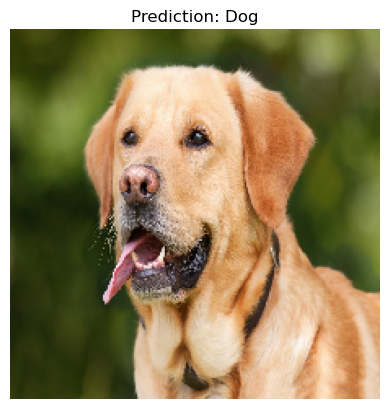

In [16]:
img_path='C:/Users/K Jyothsna/deep learning/Ex6_dataset/single_prediction/cat_or_dog_1.jpg'
img=tf.keras.preprocessing.image.load_img(img_path,target_size=(227,227))
img_array=np.expand_dims(tf.keras.preprocessing.image.img_to_array(img),axis=0)/255.0
prediction=model.predict(img_array)
print(prediction)
predicted_class="Dog" if prediction[0][0]>0.5 else 'Cat'
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}")
plt.axis("off")
plt.show()